# **1. Read Dataset**

In [24]:
import pandas as pd # to manipulate data (DataFrame)
from sklearn import datasets # import datasets from lib sklearn

# Load dataset Iris from sckit-learn
iris = datasets.load_iris()

X = iris.data    # Input dataset for machine learning
# Feature (sepal length, sepal width, petal length, petal width)

y = iris.target # Classification dataset for machine learning
# Target Classes (Setosa, Versicolor, Virginica)

# Convert data features and target classes to DataFrame
df_X = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.Series(y, name='target')

# **1a. Early Description of the Dataset**

In [25]:
df_X #Show Dataframe df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
df_y # Show Dataframe df_X

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [27]:
# Merge Feature and Target Classes into one
df_iris = pd.concat([df_X, df_y], axis=1)

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
df_iris.info() # Information on merged data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [29]:
df_iris['target'].unique() # Unique value on "target" column

array([0, 1, 2])

In [30]:
df_iris.describe() # Calculated data for statistic purposes

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# **2. Split Dataset**

In [31]:
from sklearn.model_selection import train_test_split # to split data

# Split dataset to train and test the machine learning
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42, stratify=y) # Test 20%, Training 80%

In [32]:
# Verify if the classes are equally proportional
# if it's equal, the dataset and model can be trained
df_y.value_counts(normalize=True)

,proportion
target,
0,0.333333
1,0.333333
2,0.333333


# **3. Dataset Normalization**

In [33]:
from sklearn.preprocessing import StandardScaler # to normalize data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **4. Choosing and Train the Machine Learning Model**

In [34]:
from sklearn.svm import SVC # Model or Algorithm used for the machine learning (SVM)
#Support Vector Machine

# Making the SVM model with the kernel 'rbf' (Radial Basis Function)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)

SVC()

# **5. Predict and Evaluate Model Performance**

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # to evaluate machine learning model performance

y_pred = svm_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# **6. Evaluation Results**

In [36]:
# Print Results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 96.67%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# **7. Visualize with Confusion Matrix**

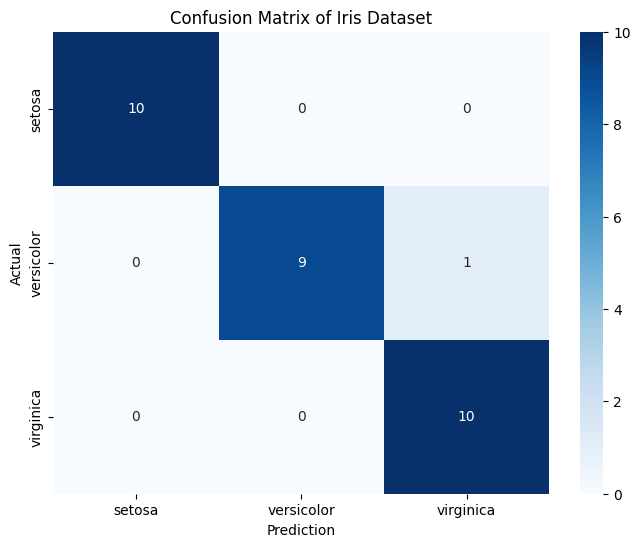

In [37]:
import matplotlib.pyplot as plt # to visualize data in graph
import seaborn as sns # to colorize visualitzation

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Iris Dataset")
plt.show()

# **8. Visualize with Pairplot**

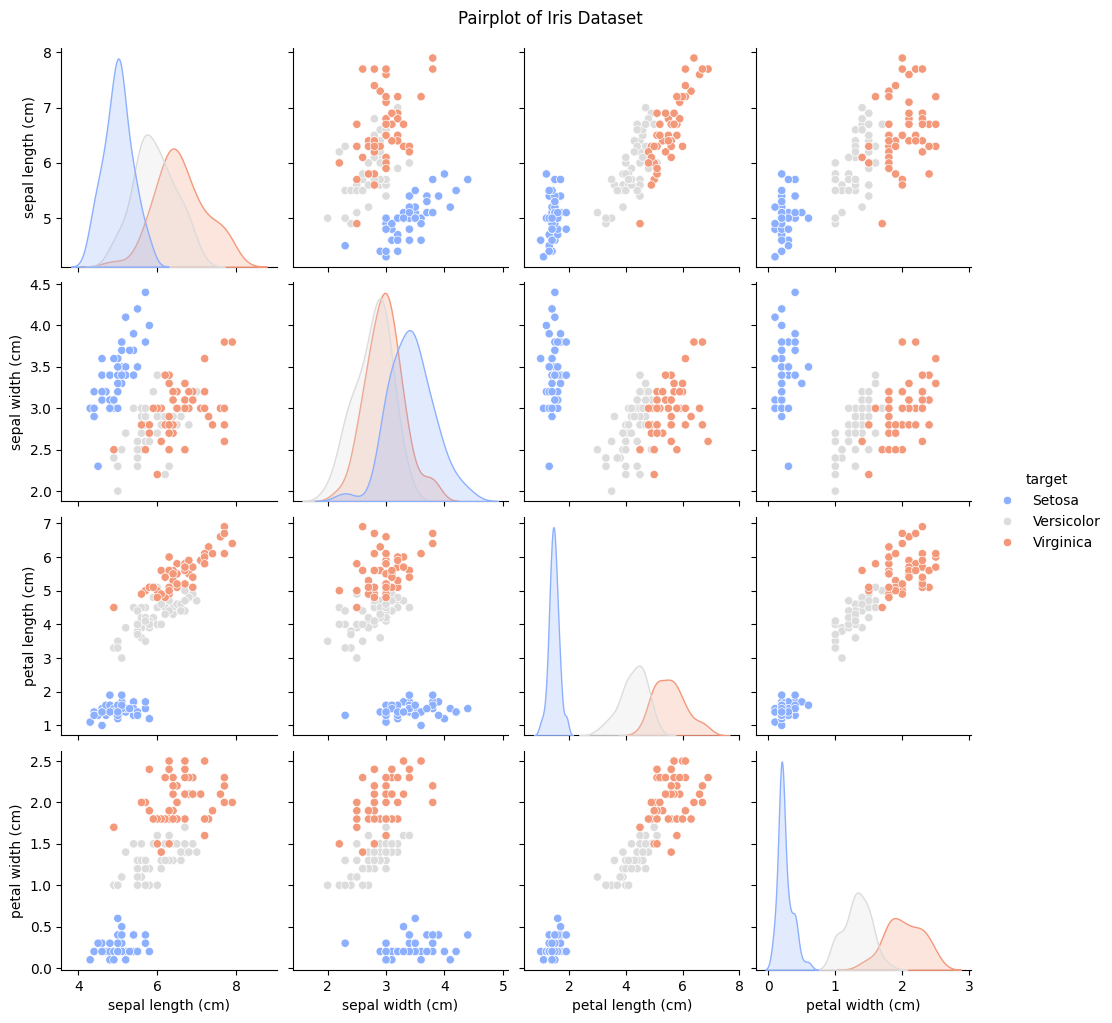

In [38]:
import matplotlib.pyplot as plt # to visualize data in graph
import seaborn as sns # to colorize visualitzation

df_X["target"] = df_y.map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})

sns.pairplot(df_X, hue="target", palette="coolwarm")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


# **9. Visualize with Swarmplot**

<ipython-input-39-4eda01f8d537>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Feature', y='Value', data=df_melted[df_melted["target"] == target],
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-39-4eda01f8d537>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate the label so it will looks good
<ipython-input-39-4eda01f8d537>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

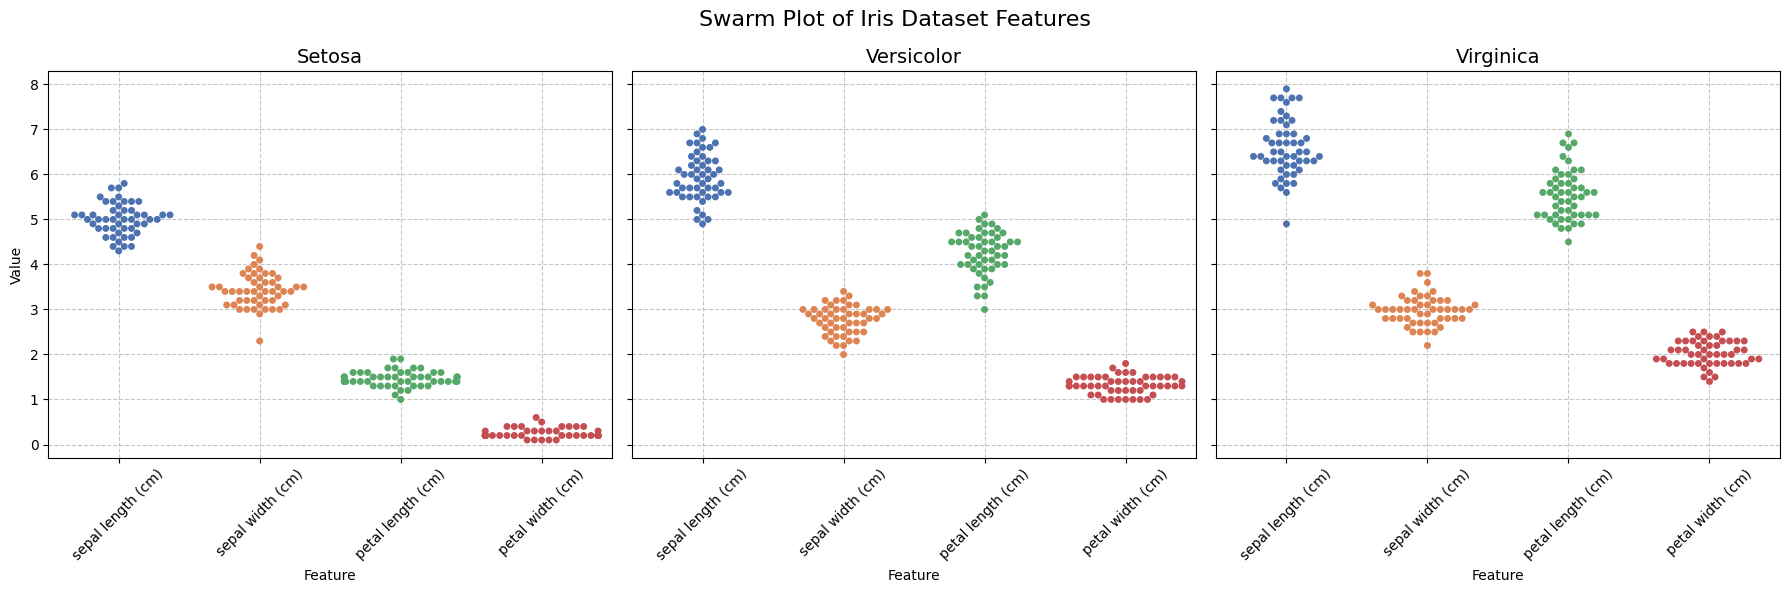

In [39]:
import matplotlib.pyplot as plt # to visualize data in graph
import seaborn as sns # to colorize visualitzation

# Merge dataframe feature and target label
df = df_X.copy()
df["target"] = df_y.map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})  # Menambahkan label target
df_melted = df.melt(id_vars='target', var_name='Feature', value_name='Value')

# Create subplot 1 row 3 column
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List classes name
target_classes = ["Setosa", "Versicolor", "Virginica"]

# Loop to create 3 graph (1 for each classes)
for i, target in enumerate(target_classes):
    ax = axes[i]  # Pilih subplot ke-i
    sns.swarmplot(x='Feature', y='Value', data=df_melted[df_melted["target"] == target],
                  palette='deep', ax=ax)

    ax.set_title(f"{target}", fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate the label so it will looks good
    ax.set_xlabel("Feature")
    ax.set_ylabel("Value" if i == 0 else "")  # Only on the first sublot that has label Y

    # Insert grid to every subplot
    ax.grid(True, linestyle='--', alpha=0.7)

plt.suptitle("Swarm Plot of Iris Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()


# **10. Visualize with Ditribution Target Class**

<ipython-input-19-1ddc2f5e81eb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_y.to_frame(), palette="pastel")


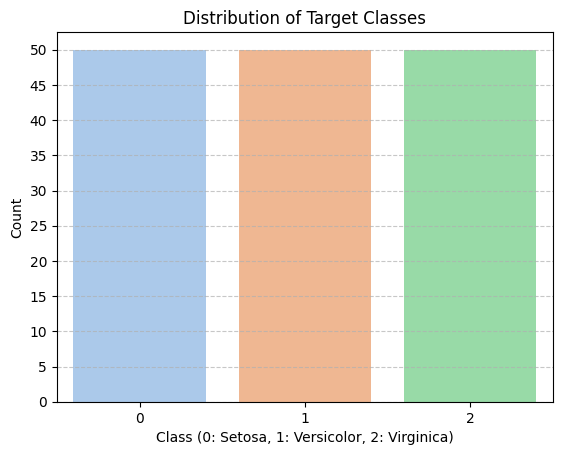

In [19]:
import matplotlib.pyplot as plt # to visualize data in graph
import seaborn as sns # to colorize visualitzation
import numpy as np # for array calculation


# Visualize the distribution of target classes
sns.countplot(x='target', data=df_y.to_frame(), palette="pastel")
plt.title('Distribution of Target Classes of Iris Dataset')
plt.xlabel('Class (0: Setosa, 1: Versicolor, 2: Virginica)')
plt.ylabel('Count')

# Show label every 5 number
max_count = df_y.value_counts().max()  # max value for Y
plt.yticks(np.arange(0, max_count + 5, 5))  # Show label every 5 number

# Show Horizontal Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()